# Photosynthetic pigment extractions via Spectrophotometry

In [1]:
# Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as ss

%matplotlib inline

## Paine protocol for Red algae pigment extraction
Pigment extraction and spectrophotometry of phycobilins; phycoerythrin (PE) and phycocyanin (PC).
- $ Phycoerythin \ (mg/ml)=((A_{564} - A_{592}) – (A_{455} - A_{592}) \ 0.20) * 0.12 $
- $ Phycocyanin \ (mg/ml) = ((A_{618} - A_{645}) – (A_{592} - A_{645}) 0.51) * 0.15 $
- $ Chlorophyll\ (mg/ml) = (13.7 x A_{665}) - (5.76 x A_{649}) $

Plotting the whole Absorbance spectra to visualize how the formula works. Notice PE in magenta and PC in 

### Prepare output dataframes

In [2]:
# Prepare sample dataframe
col_names = ['CE01A','CE01B','CE02','CE03','CE03B','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']
df_samples = pd.DataFrame(columns=col_names)

# Prepare pigment concentration dataframe.
# Different formulas
df_concentrations = pd.DataFrame(columns=['PE','PC','Chl','Pheo','K_APC','K_PC','K_PE','S_PC','S_PE'])

# Phycobilins

In [3]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Phycobillins")
csv_list = list(files_path.glob('*.csv'))
csv_phycobilins = csv_list # Later used for plots
df_weights = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_weights.csv", index_col=0)
df_area = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_area.csv", index_col=0)

In [4]:
samples_id = []
samples = []

#Phycobilins
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Cleaning dataframe
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    #df_bin = df_bin.rename(columns={'Absorbance [A]': label})
    
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
# df_bin = df_bin.loc[400:800] # Only 380 - 800 nm wavelengths

df_bin

,CE01A,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
Wavelength [nm],,,,,,,,,,,,,,
190,-0.181546,-0.019676,-0.204937,-0.308024,-0.034040,0.172627,-0.209270,-0.203245,-0.076399,-0.069816,-0.149166,-0.093154,0.097903,0.100215
191,-0.172693,-0.016415,-0.211636,-0.298126,-0.046517,0.140339,-0.192369,-0.198947,-0.082495,-0.089302,-0.142544,-0.109674,0.089675,0.081371
192,-0.066635,-0.044384,-0.266290,-0.134540,-0.152453,-0.114844,-0.036365,-0.086332,-0.078360,-0.190873,-0.034308,-0.155885,0.037482,-0.097039
193,-0.068345,-0.102459,-0.428714,-0.282330,-0.143660,-0.246225,-0.127427,0.015054,0.026751,-0.040996,0.051943,-0.137339,-0.151444,-0.150034
194,-0.210832,-0.053354,-0.285542,-0.562166,-0.231597,-0.311518,-0.199321,-0.072518,0.013906,0.079015,-0.016624,-0.210443,-0.338046,-0.226296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.000784,0.000036,0.000242,-0.000138,-0.000034,-0.000035,0.000683,0.000258,0.001016,0.000635,0.000532,0.001114,0.000037,0.000846
1097,0.000798,-0.000046,0.000169,0.000196,-0.000005,0.000042,0.000768,0.000420,0.001310,0.001089,0.000832,0.001633,0.000197,0.000856
1098,0.000933,-0.000096,0.000181,0.000190,-0.000078,0.000080,0.000817,0.000518,0.001356,0.001248,0.000879,0.001619,0.000267,0.001058


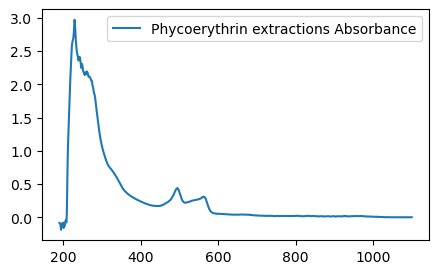

In [5]:
# Inspect some pigmented samples
plt.figure(figsize=[5,3])
plt.plot(df_bin.iloc[:,:].mean(axis=1), label='Phycoerythrin extractions Absorbance')

# Inspect Bleached and an erroneous measurements
# plt.plot(df_bin['CE01A'], label='Measurement error')
# plt.plot(df_bin['CE01B'], label='Bleached CCA 1')
# plt.plot(df_bin['CE03B'], label='Bleached CCA 2')

plt.legend()
plt.show()

In [6]:
# Peaks
fpeaks = ss.find_peaks(df_bin.iloc[:,:].mean(axis=1), height=0.2)
for peak in fpeaks[0]: print(df_bin.index[peak])

229
242
248
257
261
267
494
563


In [7]:
# Seems that CE01A was an erroneous measurement, store mean of bleached only
cca_bleached = df_bin.loc[400:800,['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)
# col_names_d = ['CE02','CE03','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']

df_pb = df_bin_d
cca_phycob = df_pb.loc[400:800].mean(axis=1)

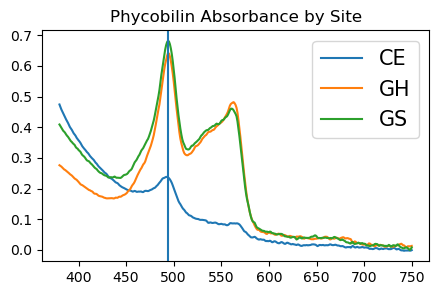

In [8]:
# Figure
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(df_bin_d.loc[380:750,['CE02','CE03','CE04']].mean(axis=1), label='CE')
plt.plot(df_bin_d.loc[380:750,['GN02','GN03','GN04','GN05','GN06','GN07','GN08']].mean(axis=1), label='GH')
plt.plot(df_bin_d.loc[380:750,['GS03']], label='GS')
plt.title('Phycobilin Absorbance by Site')
plt.legend(fontsize=15)

# plt.axvline(564,**kwargs) # Phycoerythrin
# plt.axvline(455,**kwargs)
# plt.axvline(618,**kwargs2) # Phycocyanin
# plt.axvline(645,**kwargs2)
# plt.axvline(592,**kwargs2)
# plt.axvline(592,**kwargs)

plt.axvline(494)

plt.show()

## Absorbance inspection

### Identify R-Phycoerythrin type
- Based on Samsonoff & MacColl 2001. *Arch Microbiol*

<center> <b>Table I</b> Absorption (A) characteristics of the four types of R-phycoerythrin
    
| R-Phycoerythrin type | A545nm/A495 nm | A565 nm/A495 nm |
| -------------------- | -------------- | --------------- |
| I                    | 1.08           | 1.16            |
| II                   | 1.24           | 1.50            |
| III                  | 1.17           | 1.31            |
| IV                   | 0.70           | 0.99            | 
    

In [9]:
# A545/A495 nm
a545 = df_pb.loc[df_pb.index == 545.0] # phycoerythrobilin
a495 = df_pb.loc[df_pb.index == 495.0] # phycourobilin

# A565/A495 nm
a565 = df_pb.loc[df_pb.index == 565.0] # phycoerythrobilin
a495 = df_pb.loc[df_pb.index == 495.0] # phycourobilin

ratio1 = a545/a495.values
ratio2 = a565/a495.values

print("CE A545/A495 nm: ", ratio1[['CE02','CE03','CE04']].values.mean())
print("CE A565/A495 nm: ", ratio2[['CE02','CE03','CE04']].values.mean())

print("GN A545/A495 nm: ", ratio1[['GN02','GN03','GN04','GN05','GN06','GN07','GN08']].values.mean())
print("GN A565/A495 nm: ", ratio2[['GN02','GN03','GN04','GN05','GN06','GN07','GN08']].values.mean())

print("GS A545/A495 nm: ", ratio1['GS03'].values.mean())
print("GS A565/A495 nm: ", ratio2['GS03'].values.mean())

CE A545/A495 nm:  0.3770994759558359
CE A565/A495 nm:  0.36853528180841666
GN A545/A495 nm:  0.6404806353073776
GN A565/A495 nm:  0.7462483470843557
GS A545/A495 nm:  0.6055509461940403
GS A565/A495 nm:  0.6521883679329661


### Purity Index of fraction *A565/A280*
- Note that this step is performed after R-PE concentration (mg/ml) via Beer & Eshel equations. See next section.
- As in Rossano et al. 2003. *J. of Biotechnology*
    - A566/A280 > 5.3
    - A566/A495 < 1.5
    - A620/A566 < 0.005

In [10]:
# Decided to use our A at 563 and 494 peaks
a563 = df_pb.loc[df_pb.index == 563.0]
a280 = df_pb.loc[df_pb.index == 280.0]
a494 = df_pb.loc[df_pb.index == 494.0]
a620 = df_pb.loc[df_pb.index == 620.0]

print("Purity Index 1: ", a563/a280.values)
print("Purity Index 2: ", a563/a494.values)
print("Purity Index 3: :", a620/a563.values)

Purity Index 1:                       CE02      CE03      CE04      GN02      GN03      GN04  \
Wavelength [nm]                                                               
563              0.025875  0.029928  0.022537  0.369537  0.284099  0.342842   

                     GN05      GN06      GN07      GN08      GS03  
Wavelength [nm]                                                    
563              0.231811  0.260333  0.312199  0.314095  0.153088  
Purity Index 2:                       CE02      CE03      CE04      GN02      GN03      GN04  \
Wavelength [nm]                                                               
563              0.334659  0.404293  0.366367  0.817105  0.778955  0.762818   

                     GN05      GN06      GN07      GN08      GS03  
Wavelength [nm]                                                    
563              0.716669  0.648083  0.795496  0.796606  0.666793  
Purity Index 3: :                      CE02      CE03      CE04      GN02      GN0

### Fourth derivative analysis to resolve absorbance peaks
- As in Sampath-Wiley & Neefus (2007). *J. of Appl. Phycol*

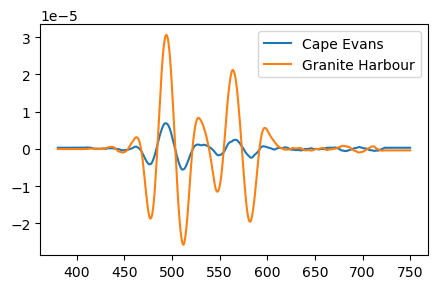

In [11]:
CE_4d = ss.savgol_filter(df_pb.loc[380:750,['CE02','CE03','CE04']].mean(axis=1), 55, 4, deriv=4)
GH_4d = ss.savgol_filter(df_pb.loc[380:750,['GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']].mean(axis=1), 55, 4, deriv=4)

plt.figure(figsize=[5,3])
plt.plot(range(380,751,1), CE_4d, label = 'Cape Evans')
plt.plot(range(380,751,1), GH_4d, label='Granite Harbour')
plt.legend()
plt.show()

## Phycobilin concentration formulas

In [12]:
# Phycoerythrin concentration (mg/ml)
a564 = df_bin.loc[df_bin.index == 564.0] # Get position
#a564 = a564['Absorbance [A]'].values # Get A values
a592 = df_bin.loc[df_bin.index == 592.0]
#a592 = a592['Absorbance [A]'].values
a455 = df_bin.loc[df_bin.index == 455.0]
#a455 = a455['Absorbance [A]'].values
# Applying PE formula
pe_conc = ((a564.values - a592.values) - (a455.values - a592.values) * 0.2) * 0.12
#print('Phycoerythrin (mg/ml)', pe_conc)

# Phycocyanin concentration (mg/ml)
a618 = df_bin.loc[df_bin.index == 618.0] # Get position
#a618 = a618['Absorbance [A]'].values # Get A values
a645 = df_bin.loc[df_bin.index == 645.0]
#a645 = a645['Absorbance [A]'].values
a592 = df_bin.loc[df_bin.index == 592.0]
#a592 = a592['Absorbance [A]'].values

# Applying PC formula
pc_conc = ((a618.values - a645.values) - (a592.values - a645.values) * 0.51) * 0.15
#print('Phycocyanin (mg/ml)', pc_conc)

# Kursar et al. formulas 
a494 = df_bin.loc[df_bin.index == 494.0] # Modified to the peak obtained in our measeruments from 498 to 494
#a494 = a494['Absorbance [A]'].values
a614 = df_bin.loc[df_bin.index == 614.0]
#a614 = a614['Absorbance [A]'].values
a651 = df_bin.loc[df_bin.index == 651.0]
#a651 = a651['Absorbance [A]'].values

# Apply Kursar et al. formulas
k_apc_conc = (181.3 * a651.values) - (22.3 * a614.values)
k_pc_conc = (151.1 * a614.values) - (99.1 * a651.values)
k_pe_conc = (155.8 * a494.values) - (40.0 * a614.values) - (10.5 * a651.values)

# Sampath-Wiley & Neefus (2006) - Formulas
a564 = a564 # Used in Paine equation
a618 = a618 # Used in Paine equation
a730 = df_bin.loc[df_bin.index == 730.0]
#a730 = a730['Absorbance [A]'].values

# Apply Sampath-Wiley & Neefus formulas
s_pc_conc = 0.154 * (a618.values - a730.values)
s_pe_conc = 0.1247* ((a564.values - a730.values) - 0.4583 * (a618.values - a730.values))

# Ismail & Osman 2016
a562 = df_bin.loc[df_bin.index == 562.0]
a615 = df_bin.loc[df_bin.index == 615.0]
a652 = df_bin.loc[df_bin.index == 652.0]

io_pc = ((a615.values) * (0.475 * a652.values)) / 5.34
io_apc = ((a652.values) - (0.208 * a615.values)) / 5.09
io_pe = ((a562.values) - (2.41 * io_pc) - (0.849 * io_apc)) / 9.62


# Build Dataframe
df_concentrations = pd.DataFrame({'PE':pe_conc[0], 'PC':pc_conc[0],
                                  'K_APC':k_apc_conc[0], 'K_PC':k_pc_conc[0],
                                  'K_PE':k_pe_conc[0], 'S_PC':s_pc_conc[0],
                                  'S_PE':s_pe_conc[0], 'IO_PC':io_pc[0], 'IO_APC':io_apc[0],
                                  'IO_PE':io_pe[0]
                                 })

In [13]:
df_concentrations

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,IO_PC,IO_APC,IO_PE
0,0.000060,-0.000055,32.361438,11.064655,24.143856,0.001058,0.001337,3.775423e-03,0.031920,0.018315
1,-0.000049,0.000198,-0.776963,-0.114557,-1.056065,-0.001736,-0.001048,5.511385e-07,-0.000077,-0.000914
2,0.004148,-0.000719,-0.730408,3.188434,46.608816,0.001599,0.011784,7.108313e-06,0.000267,0.010360
3,0.003146,-0.000575,3.133166,2.432481,37.575977,0.003742,0.010768,5.516744e-05,0.002921,0.010199
4,-0.000759,-0.000606,1.318236,0.774676,5.715088,0.000894,0.001146,6.004793e-06,0.001032,0.001832
5,0.000132,-0.000903,2.637792,1.941331,22.879648,0.001914,0.005045,2.974745e-05,0.002089,0.005853
6,0.019624,-0.000023,17.968139,6.641886,52.887878,0.004492,0.025406,1.232619e-03,0.017566,0.030105
7,0.028644,0.000230,0.984888,0.911324,54.193791,0.003500,0.033964,1.094172e-05,0.001097,0.028047
8,0.063476,0.000417,4.358205,3.393676,125.317736,0.007876,0.075174,1.227641e-04,0.004234,0.064236
9,0.066021,0.000158,3.979972,3.688768,142.312250,0.007626,0.079746,1.121051e-04,0.003733,0.068662


# Chlorophyll

In [14]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Chlorophylls")
csv_list = list(files_path.glob('*.csv'))
csv_chl = csv_list

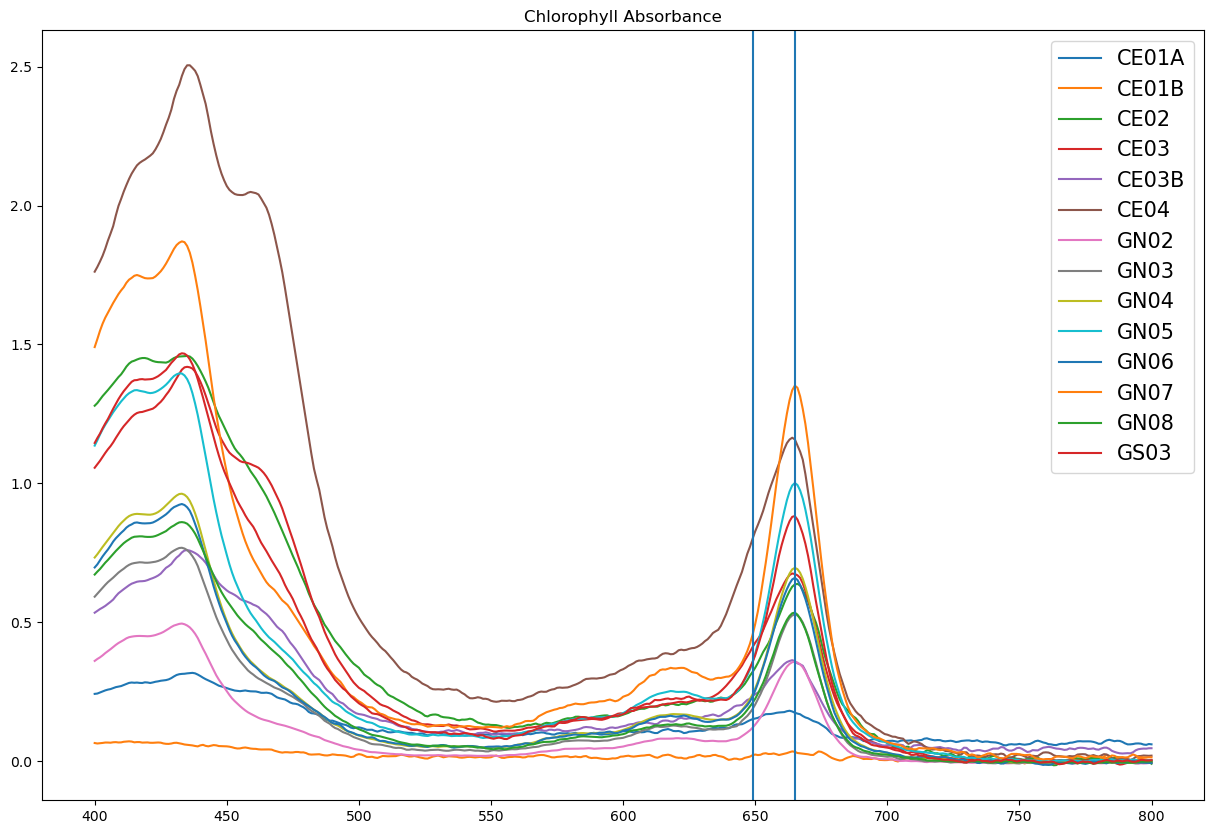

In [15]:
samples_id = []
samples = []

#Chlorophyll
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 400 - 800 nm wavelengths

fig, ax = plt.subplots(figsize=(15, 10))
# plt.plot(df_bin[['CE01A','CE01B','CE02','CE03','CE03B','CE04']].mean(axis=1), label='CE') # Cape Evans
# plt.plot(df_bin[['GN02','GN03','GN04','GN05','GN06','GN07','GN08']].mean(axis=1), label='GN') # Granite Harbour North
# plt.plot(df_bin['GS03'], label='GS') # Granite Harbour South
plt.plot(df_bin, label=col_names)
plt.title('Chlorophyll Absorbance')
plt.legend(fontsize=15)

plt.axvline(649) # Chlorophyll
plt.axvline(665)

plt.show()

In [16]:
cca_chl_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)

df_chl = df_bin_d

# CE_chl = df_bin_d[CE].mean(axis=1)
# GN_chl = df_bin_d[GN].mean(axis=1)
# GS_chl = df_bin_d[GS]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


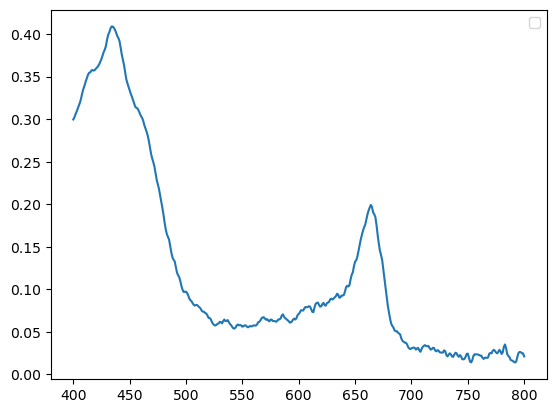

In [17]:
# plt.plot(CE_chl)
# plt.plot(GN_chl)
# plt.plot(GS_chl)
#plt.fill_between(df_bin.index, phycob_pstd, phycob_nstd, color='C0', alpha=0.5)
plt.plot(cca_chl_bleached)
#plt.plot(cca_chl)
plt.legend()

In [18]:
# Chlorophyll concentration (mg)
a665 = df_bin.loc[df_bin.index == 665.0] # Get position
a649 = df_bin.loc[df_bin.index == 649.0]

# Applying formula
chl_conc = ((13.7 * a665.values)-(5.76 * a649.values))
#print('Chlorophyll (mg/ml)', chl_conc)
# Build Dataframe
df_concentrations['Chl'] = chl_conc[0]

df_concentrations.head()

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,IO_PC,IO_APC,IO_PE,Chl
0,0.000060,-0.000055,32.361438,11.064655,24.143856,0.001058,0.001337,3.775423e-03,0.031920,0.018315,1.514997
1,-0.000049,0.000198,-0.776963,-0.114557,-1.056065,-0.001736,-0.001048,5.511385e-07,-0.000077,-0.000914,0.334363
2,0.004148,-0.000719,-0.730408,3.188434,46.608816,0.001599,0.011784,7.108313e-06,0.000267,0.010360,6.865503
3,0.003146,-0.000575,3.133166,2.432481,37.575977,0.003742,0.010768,5.516744e-05,0.002921,0.010199,6.862322
4,-0.000759,-0.000606,1.318236,0.774676,5.715088,0.000894,0.001146,6.004793e-06,0.001032,0.001832,3.590715


## Pheophytin

In [19]:
# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Pheophytin")
csv_list = list(files_path.glob(r'*.csv'))
csv_pheo = csv_list # Used for plots

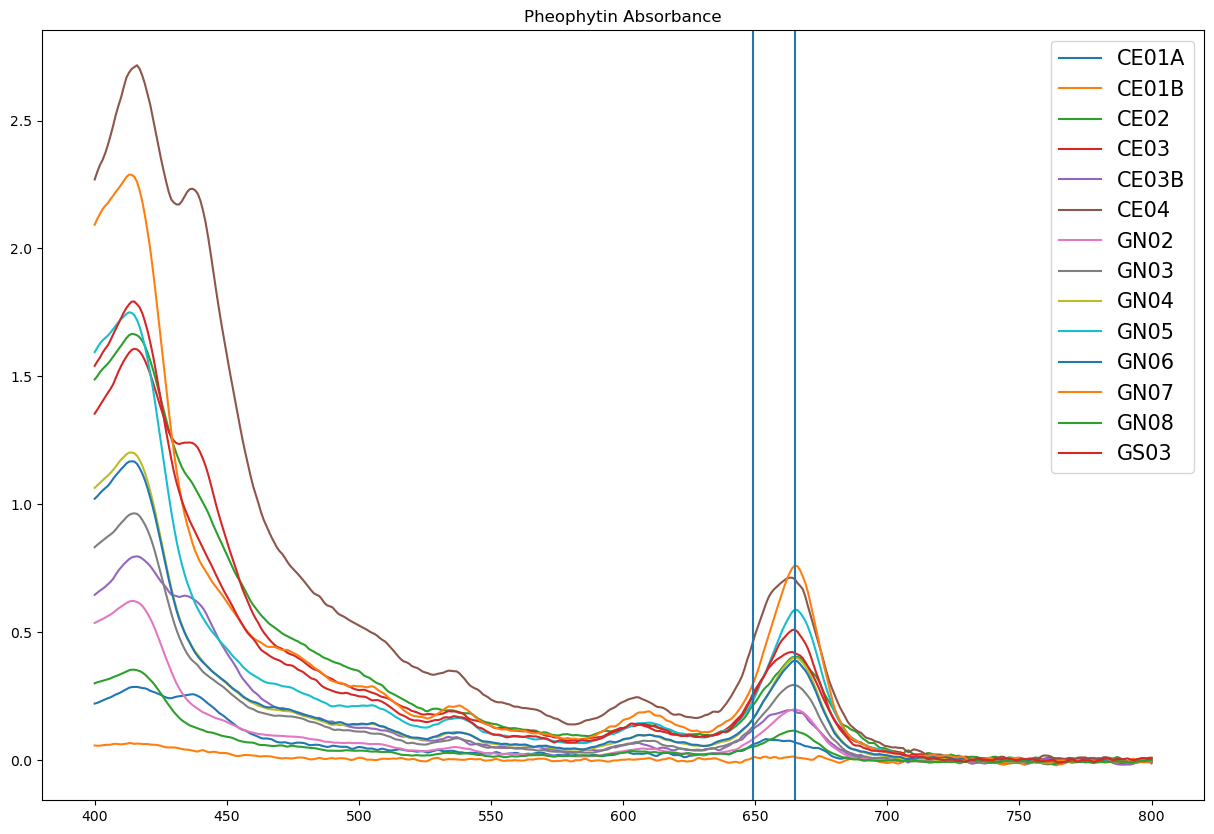

In [20]:
samples_id = []
samples = []

#Chlorophyll
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    # Now we know where Absorbance values start, note header arg
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    samples.append(df[label])
    samples_id.append(label)

samples_df = pd.concat(samples, axis=1, ignore_index=True)
#samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin.index.name = 'Wavelength [nm]'
df_bin = df_bin.loc[400:800] # Only 400 - 800 nm wavelengths

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df_bin, label=col_names)
plt.title('Pheophytin Absorbance')
plt.legend(fontsize=15)

plt.axvline(649) # Chlorophyll
plt.axvline(665)

plt.show()

In [21]:
cca_pheo_bleached = df_bin[['CE01B','CE03B']].mean(axis=1)
df_bin_d = df_bin.drop(labels=['CE01B','CE03B','CE01A'], axis=1)
cca_pheo = df_bin.mean(axis=1)

In [22]:
# Chlorophyll concentration (mg/ml)
a665 = df_bin.loc[df_bin.index == 665.0] # Get position
a649 = df_bin.loc[df_bin.index == 649.0]

# Applying formula - Same as chl
pheo_conc = ((13.7 * a665.values)-(5.76 * a649.values))
#print('Chlorophyll (mg/ml)', pc_conc)
# Build Dataframe
df_concentrations['Pheo'] = pheo_conc[0]

df_concentrations.head()

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,IO_PC,IO_APC,IO_PE,Chl,Pheo
0,0.000060,-0.000055,32.361438,11.064655,24.143856,0.001058,0.001337,3.775423e-03,0.031920,0.018315,1.514997,0.605256
1,-0.000049,0.000198,-0.776963,-0.114557,-1.056065,-0.001736,-0.001048,5.511385e-07,-0.000077,-0.000914,0.334363,0.119528
2,0.004148,-0.000719,-0.730408,3.188434,46.608816,0.001599,0.011784,7.108313e-06,0.000267,0.010360,6.865503,4.293529
3,0.003146,-0.000575,3.133166,2.432481,37.575977,0.003742,0.010768,5.516744e-05,0.002921,0.010199,6.862322,4.254229
4,-0.000759,-0.000606,1.318236,0.774676,5.715088,0.000894,0.001146,6.004793e-06,0.001032,0.001832,3.590715,1.945285


In [23]:
#Adjust Chlorophyll values
df_concentrations['Chl'] = df_concentrations['Chl'] - df_concentrations['Pheo']

## Prepare final dataframe

In [24]:
# Change values below 0 - This means Absorbance from that pigment was undetectable
df_concentrations[df_concentrations < 0] = 0

# Transpose
df_concentrations = df_concentrations.T

# Set column names
df_concentrations.columns = col_names

In [25]:
df_concentrations

,CE01A,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE,0.000060,0.000000e+00,0.004148,0.003146,0.000000,0.000132,0.019624,0.028644,0.063476,0.066021,0.044212,0.096608,0.009669,0.041408
PC,0.000000,1.983870e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000417,0.000158,0.000057,0.000000,0.000000,0.000000
K_APC,32.361438,0.000000e+00,0.000000,3.133166,1.318236,2.637792,17.968139,0.984888,4.358205,3.979972,2.301396,8.365172,2.340745,6.145325
K_PC,11.064655,0.000000e+00,3.188434,2.432481,0.774676,1.941331,6.641886,0.911324,3.393676,3.688768,2.535689,4.229743,1.153273,3.745780
K_PE,24.143856,0.000000e+00,46.608816,37.575977,5.715088,22.879648,52.887878,54.193791,125.317736,142.312250,108.211602,181.119622,20.245342,103.786666
S_PC,0.001058,0.000000e+00,0.001599,0.003742,0.000894,0.001914,0.004492,0.003500,0.007876,0.007626,0.006080,0.007974,0.000630,0.004568
S_PE,0.001337,0.000000e+00,0.011784,0.010768,0.001146,0.005045,0.025406,0.033964,0.075174,0.079746,0.055224,0.112534,0.011687,0.052463
IO_PC,0.003775,5.511385e-07,0.000007,0.000055,0.000006,0.000030,0.001233,0.000011,0.000123,0.000112,0.000045,0.000293,0.000021,0.000167
IO_APC,0.031920,0.000000e+00,0.000267,0.002921,0.001032,0.002089,0.017566,0.001097,0.004234,0.003733,0.002197,0.007832,0.002002,0.005534
IO_PE,0.018315,0.000000e+00,0.010360,0.010199,0.001832,0.005853,0.030105,0.028047,0.064236,0.068662,0.047022,0.096801,0.010960,0.047175


In [26]:
# Prepare weights
# weights = df_weights.groupby(np.arange(len(df_weights)) // 2).mean()
# weights = weights.T
# weights.columns = col_names


In [27]:
# Concat weighths [mg] & area [cm2]
df_samples = pd.concat([df_concentrations, df_area.T], axis=0)

In [28]:
df_samples

,CE01A,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE,0.000060,0.000000e+00,0.004148,0.003146,0.000000,0.000132,0.019624,0.028644,0.063476,0.066021,0.044212,0.096608,0.009669,0.041408
PC,0.000000,1.983870e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000230,0.000417,0.000158,0.000057,0.000000,0.000000,0.000000
K_APC,32.361438,0.000000e+00,0.000000,3.133166,1.318236,2.637792,17.968139,0.984888,4.358205,3.979972,2.301396,8.365172,2.340745,6.145325
K_PC,11.064655,0.000000e+00,3.188434,2.432481,0.774676,1.941331,6.641886,0.911324,3.393676,3.688768,2.535689,4.229743,1.153273,3.745780
K_PE,24.143856,0.000000e+00,46.608816,37.575977,5.715088,22.879648,52.887878,54.193791,125.317736,142.312250,108.211602,181.119622,20.245342,103.786666
S_PC,0.001058,0.000000e+00,0.001599,0.003742,0.000894,0.001914,0.004492,0.003500,0.007876,0.007626,0.006080,0.007974,0.000630,0.004568
S_PE,0.001337,0.000000e+00,0.011784,0.010768,0.001146,0.005045,0.025406,0.033964,0.075174,0.079746,0.055224,0.112534,0.011687,0.052463
IO_PC,0.003775,5.511385e-07,0.000007,0.000055,0.000006,0.000030,0.001233,0.000011,0.000123,0.000112,0.000045,0.000293,0.000021,0.000167
IO_APC,0.031920,0.000000e+00,0.000267,0.002921,0.001032,0.002089,0.017566,0.001097,0.004234,0.003733,0.002197,0.007832,0.002002,0.005534
IO_PE,0.018315,0.000000e+00,0.010360,0.010199,0.001832,0.005853,0.030105,0.028047,0.064236,0.068662,0.047022,0.096801,0.010960,0.047175


In [29]:
df_samples = df_samples.T
df_samples

,PE,PC,K_APC,K_PC,K_PE,S_PC,S_PE,IO_PC,IO_APC,IO_PE,Chl,Pheo,Area (m2)
CE01A,0.000060,0.000000,32.361438,11.064655,24.143856,0.001058,0.001337,3.775423e-03,0.031920,0.018315,0.909741,0.605256,0.000198
CE01B,0.000000,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,5.511385e-07,0.000000,0.000000,0.214835,0.119528,0.000242
CE02,0.004148,0.000000,0.000000,3.188434,46.608816,0.001599,0.011784,7.108313e-06,0.000267,0.010360,2.571975,4.293529,0.000697
CE03,0.003146,0.000000,3.133166,2.432481,37.575977,0.003742,0.010768,5.516744e-05,0.002921,0.010199,2.608093,4.254229,0.000531
CE03B,0.000000,0.000000,1.318236,0.774676,5.715088,0.000894,0.001146,6.004793e-06,0.001032,0.001832,1.645430,1.945285,0.000337
CE04,0.000132,0.000000,2.637792,1.941331,22.879648,0.001914,0.005045,2.974745e-05,0.002089,0.005853,4.204009,7.055485,0.000260
GN02,0.019624,0.000000,17.968139,6.641886,52.887878,0.004492,0.025406,1.232619e-03,0.017566,0.030105,1.971409,2.241980,0.001020
GN03,0.028644,0.000230,0.984888,0.911324,54.193791,0.003500,0.033964,1.094172e-05,0.001097,0.028047,2.877107,3.278945,0.001889
GN04,0.063476,0.000417,4.358205,3.393676,125.317736,0.007876,0.075174,1.227641e-04,0.004234,0.064236,3.575339,4.569875,0.001884
GN05,0.066021,0.000158,3.979972,3.688768,142.312250,0.007626,0.079746,1.121051e-04,0.003733,0.068662,4.929251,6.738328,0.002026


In [30]:
# Divide by weight
# df_samples['PE_mg'] = (df_samples['PE'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['PC_mg'] = (df_samples['PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['Chl_mg'] = (df_samples['Chl'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['Pheo_mg'] = (df_samples['Pheo'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['K_APC_mg'] = (df_samples['K_APC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['K_PC_mg'] = (df_samples['K_PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['K_PE_mg'] = (df_samples['K_PE'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['S_PC_mg'] = (df_samples['S_PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['S_PE_mg'] = (df_samples['S_PE'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['IO_PC_mg'] = (df_samples['IO_PC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['IO_APC_mg'] = (df_samples['IO_APC'].values) / (df_samples['Weight (gr)'].values * 1000)
# df_samples['IO_PE_mg'] = (df_samples['IO_PE'].values) / (df_samples['Weight (gr)'].values * 1000)

In [31]:
# Concentrations are in [mg/ml] so multiply by volume [ml], then divide by area [mm] = [mg/mm2] = Pigment by area
df_samples['PE_area'] = ((df_samples['PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['PC_area'] = ((df_samples['PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['Chl_area'] = ((df_samples['Chl'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['Pheo_area'] = ((df_samples['Pheo'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_APC_area'] = ((df_samples['K_APC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_PC_area'] = ((df_samples['K_PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['K_PE_area'] = ((df_samples['K_PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['S_PC_area'] = ((df_samples['S_PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['S_PE_area'] = ((df_samples['S_PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['IO_PC_area'] = ((df_samples['IO_PC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['IO_APC_area'] = ((df_samples['IO_APC'].values) * 3) / (df_samples['Area (m2)'].values * 1000)
df_samples['IO_PE_area'] = ((df_samples['IO_PE'].values) * 3) / (df_samples['Area (m2)'].values * 1000)

In [32]:
df_samples[5:6]['Chl_area']

CE04    48.507791
Name: Chl_area, dtype: float64

In [33]:
# Inspect the data we are using
print(df_samples['PE_area'][0])
print(type(df_samples['PE_area'][1]))

0.000909454545454496
<class 'numpy.float64'>


In [34]:
# sns.scatterplot(np.log(df_samples['PE_area']))
# sns.displot(df_samples['PE_area'])

In [35]:
df_samples['Chl_area'].max()

48.507790846153874

In [36]:
# sns.distplot(df_samples['Pheo_area'])

## Export CSV - Pigment [mg/mm2]

In [37]:
## Choose columns
# df_export = df_samples.filter(['PE_area', 'PC_area', 'Chl_area','Pheo_area',
#                                'K_APC_area','K_PC_area','K_PE_area',
#                               'S_PC_area','S_PE_area', 'IO_PC_area',
#                               'IO_APC_area', 'IO_PE_area'], axis=1)

# # Removed Kursar and Pheophytin
# df_export = df_samples.filter(['PE_area', 'PC_area', 'Chl_area',
#                               'S_PC_area','S_PE_area', 'IO_PC_area',
#                               'IO_APC_area', 'IO_PE_area'], axis=1)

# Kept only original concentrations
df_export = df_samples.filter(['PE_area', 'PC_area', 'Chl_area', 'Pheo_area'], axis=1)

df_export = df_export.T

In [38]:
df_export

,CE01A,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE_area,0.000909,0.000000,0.017853,0.017771,0.000000,0.001520,0.057717,0.045491,0.101076,0.097760,0.089318,0.122032,0.046043,0.075838
PC_area,0.000000,0.002459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000366,0.000665,0.000233,0.000115,0.000000,0.000000,0.000000
Chl_area,13.783949,2.663248,11.070192,14.734987,14.647744,48.507791,5.798262,4.569254,5.693215,7.298990,6.619045,9.067947,23.059809,8.166550
Pheo_area,9.170546,1.481753,18.480038,24.035192,17.317076,81.409448,6.594059,5.207430,7.276871,9.977780,8.930974,11.018518,6.064702,10.206947


In [39]:
# Fix name, easier to merge in further analysis
df_export.rename({'CE01A':'CE01'}, axis=1, inplace=True)

In [40]:
# CE04 Chl_area and Pheo_area, are an anomlous value caused by an endophytic algae, we will replace with the mean value per site for now.
df_export.loc['Chl_area','CE04'] = df_export.loc['Chl_area',['CE01','CE01B','CE02','CE03','CE03B']].mean()
df_export.loc['Pheo_area','CE04'] = df_export.loc['Pheo_area',['CE01','CE01B','CE02','CE03','CE03B']].mean()

df_export.head()

,CE01,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE_area,0.000909,0.000000,0.017853,0.017771,0.000000,0.001520,0.057717,0.045491,0.101076,0.097760,0.089318,0.122032,0.046043,0.075838
PC_area,0.000000,0.002459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000366,0.000665,0.000233,0.000115,0.000000,0.000000,0.000000
Chl_area,13.783949,2.663248,11.070192,14.734987,14.647744,11.380024,5.798262,4.569254,5.693215,7.298990,6.619045,9.067947,23.059809,8.166550
Pheo_area,9.170546,1.481753,18.480038,24.035192,17.317076,14.096921,6.594059,5.207430,7.276871,9.977780,8.930974,11.018518,6.064702,10.206947


In [41]:
# Export pigment concentrations
# df_export.to_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\pigment-mg-mm.csv", float_format='%f')

## Plots
### Plot by pigment type

In [42]:
out_p = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry"

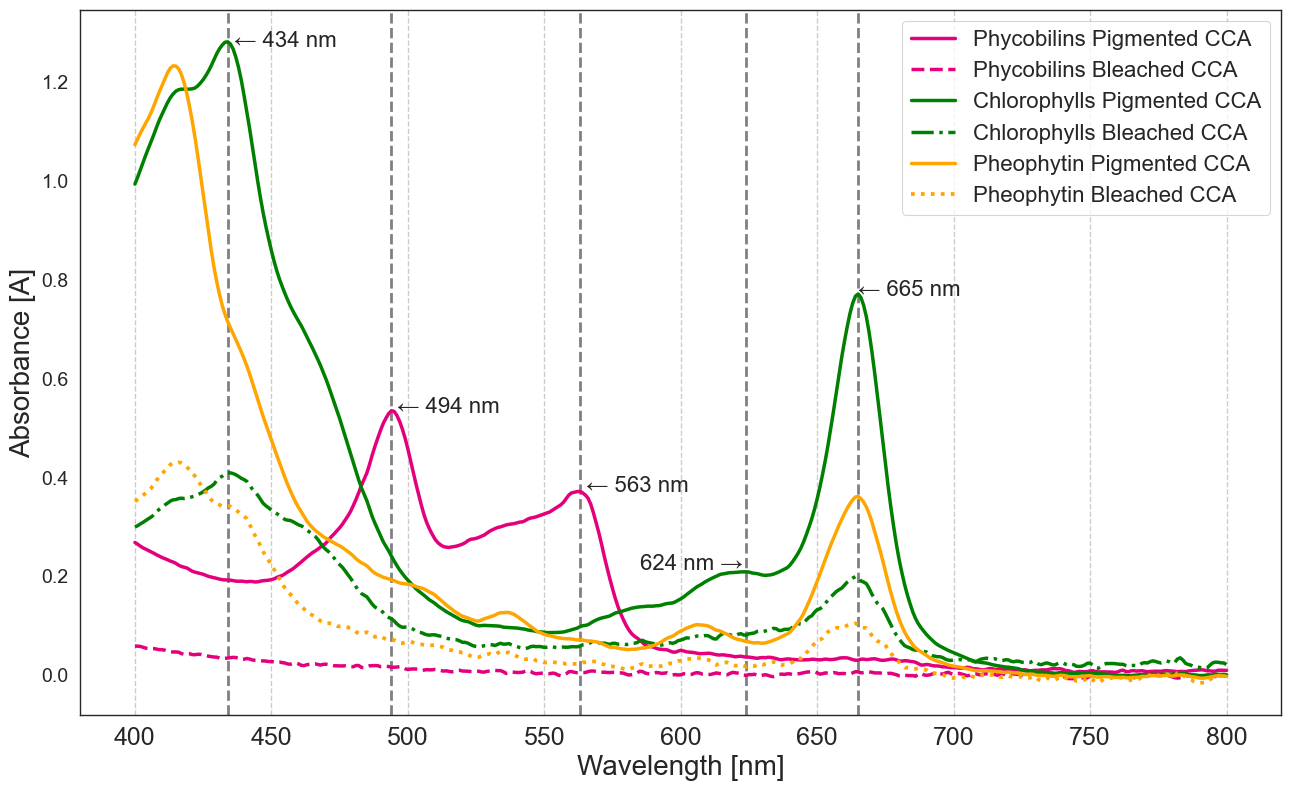

In [43]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
sns.set_style('white')
sns.set_context("paper")
sns.set_palette('husl')

# [A] peaks
plt.axvline(434, linestyle='--', lw=2, color='grey')
plt.axvline(494, linestyle='--', lw=2, color='grey')
plt.axvline(563, linestyle='--', lw=2, color='grey')
plt.axvline(624, linestyle='--', lw=2, color='grey')
plt.axvline(665, linestyle='--', lw=2, color='grey')

plt.plot(cca_phycob, label='Phycobilins Pigmented CCA', linestyle='-', lw=2.5, color='#e4007c')
plt.plot(cca_bleached, label='Phycobilins Bleached CCA', linestyle='--', lw=2.5, color='#e4007c')

plt.plot(df_chl.mean(axis=1), label='Chlorophylls Pigmented CCA', linestyle='-', lw=2.5, color='green')
plt.plot(cca_chl_bleached, label='Chlorophylls Bleached CCA', linestyle='-.', lw=2.5, color='green')

plt.plot(cca_pheo, label='Pheophytin Pigmented CCA', linestyle='-', lw=2.5, color='orange')
plt.plot(cca_pheo_bleached, label='Pheophytin Bleached CCA', linestyle=':', lw=2.7, color='orange')

plt.xlabel('Wavelength [nm]', fontdict={'fontsize':20})
plt.ylabel('Absorbance [A]', fontdict={'fontsize':20})
plt.legend(prop={'size': 16})
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)

plt.text(434, 1.27, " ← 434 nm", fontdict={'fontsize':16})
plt.text(494, 0.53, " ← 494 nm", fontdict={'fontsize':16})
plt.text(563, 0.37, " ← 563 nm", fontdict={'fontsize':16})
plt.text(585, 0.213, "624 nm →", fontdict={'fontsize':16})
plt.text(665, 0.768, "← 665 nm", fontdict={'fontsize':16})

plt.grid(axis='x', linestyle='--', linewidth=1)
plt.tight_layout()
# plt.savefig(out_p + '\Absorbance.png', dpi=600)
plt.show()

In [44]:
df_pb

,CE02,CE03,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
Wavelength [nm],,,,,,,,,,,
190,-0.204937,-0.308024,0.172627,-0.209270,-0.203245,-0.076399,-0.069816,-0.149166,-0.093154,0.097903,0.100215
191,-0.211636,-0.298126,0.140339,-0.192369,-0.198947,-0.082495,-0.089302,-0.142544,-0.109674,0.089675,0.081371
192,-0.266290,-0.134540,-0.114844,-0.036365,-0.086332,-0.078360,-0.190873,-0.034308,-0.155885,0.037482,-0.097039
193,-0.428714,-0.282330,-0.246225,-0.127427,0.015054,0.026751,-0.040996,0.051943,-0.137339,-0.151444,-0.150034
194,-0.285542,-0.562166,-0.311518,-0.199321,-0.072518,0.013906,0.079015,-0.016624,-0.210443,-0.338046,-0.226296
...,...,...,...,...,...,...,...,...,...,...,...
1096,0.000242,-0.000138,-0.000035,0.000683,0.000258,0.001016,0.000635,0.000532,0.001114,0.000037,0.000846
1097,0.000169,0.000196,0.000042,0.000768,0.000420,0.001310,0.001089,0.000832,0.001633,0.000197,0.000856
1098,0.000181,0.000190,0.000080,0.000817,0.000518,0.001356,0.001248,0.000879,0.001619,0.000267,0.001058


### Plot by sites

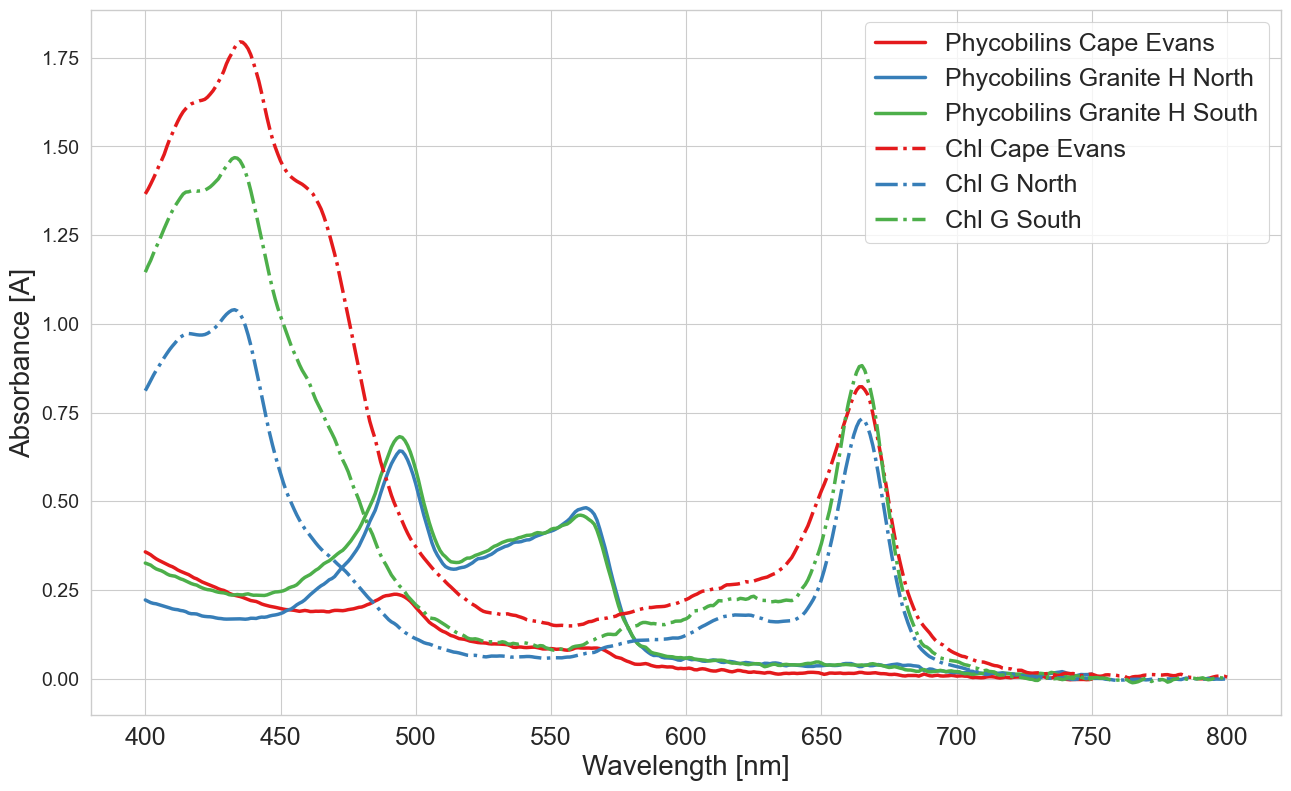

In [45]:
### Plot style

sns.set(rc={'figure.figsize':(13,8)})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('Set1',3)

# Mean and std of all sites
# phycob_pstd = df_bin_d.mean(axis=1) + df_bin_d.std(axis=1)
# phycob_nstd = df_bin_d.mean(axis=1) - df_bin_d.std(axis=1)

# Mean per site
CE = ['CE02','CE03','CE04']
GN = ['GN02','GN03','GN04','GN05','GN06','GN07','GN08']
GS =['GS03']

CE_phycob = df_pb.loc[400:750,['CE02','CE03','CE04']].mean(axis=1)
GN_phycob = df_pb.loc[400:750,['GN02','GN03','GN04','GN05','GN06','GN07','GN08']].mean(axis=1)
GS_phycob = df_pb.loc[400:750,['GS03']]

CE_chl = df_chl[CE].mean(axis=1)
GN_chl = df_chl[GN].mean(axis=1)
GS_chl = df_chl[GS]

plt.plot(CE_phycob, label='Phycobilins Cape Evans', linestyle='-', lw=2.5)
plt.plot(GN_phycob, label='Phycobilins Granite H North', linestyle='-', lw=2.5)
plt.plot(GS_phycob, label='Phycobilins Granite H South', linestyle='-', lw=2.5)

plt.plot(CE_chl, label='Chl Cape Evans', linestyle='-.', lw=2.5)
plt.plot(GN_chl, label='Chl G North', linestyle='-.', lw=2.5)
plt.plot(GS_chl, label='Chl G South', linestyle='-.', lw=2.5)

# plt.plot(cca_phycob) # erase possibly
#plt.fill_between(df_bin.index, phycob_pstd, phycob_nstd, color='C0', alpha=0.5)
# plt.plot(cca_bleached)

plt.xlabel('Wavelength [nm]', fontdict={'fontsize':20})
plt.ylabel('Absorbance [A]', fontdict={'fontsize':20})
plt.legend(prop={'size': 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)

plt.tight_layout()
# plt.savefig(out_p + '\Sites-Absorbance.png', dpi=600)
plt.show()

### Plot Pigment [mg/mm2] plots - via Beer & Eshel formulas

In [68]:
## Add Site column
site = []

for i, sample in enumerate(df_samples.index):
    s = df_samples.index[i][0:2]
    site.append(s);

df_samples.insert(loc=0, column = 'Site', value = np.array(site))

ValueError: cannot insert Site, already exists

In [69]:
# CE04 Chl_area and Pheo_area, are an anomlous value caused by an endophytic algae, we will replace with the mean value per site for now.
df_samples.loc['CE04', 'Chl_area'] = df_samples.loc[['CE01A','CE01B','CE02','CE03','CE03B'], 'Chl_area'].mean()
df_samples.loc['CE04', 'Pheo_area'] = df_samples.loc[['CE01A','CE01B','CE02','CE03','CE03B'], 'Pheo_area'].mean()

In [70]:
# Ratio figure
data = df_samples[['PE_area','PC_area','Chl_area','Pheo_area']]
data

,PE_area,PC_area,Chl_area,Pheo_area
CE01A,0.000909,0.000000,13.783949,9.170546
CE01B,0.000000,0.002459,2.663248,1.481753
CE02,0.017853,0.000000,11.070192,18.480038
CE03,0.017771,0.000000,14.734987,24.035192
CE03B,0.000000,0.000000,14.647744,17.317076
CE04,0.001520,0.000000,11.380024,14.096921
GN02,0.057717,0.000000,5.798262,6.594059
GN03,0.045491,0.000366,4.569254,5.207430
GN04,0.101076,0.000665,5.693215,7.276871
GN05,0.097760,0.000233,7.298990,9.977780


In [71]:
## Convert frequencies to percent cover and save DataFrame
data_pct = data.apply(lambda x: x*100/sum(x), axis=1)
data_pct.head()

,PE_area,PC_area,Chl_area,Pheo_area
CE01A,0.003962,0.000000,60.046640,39.949398
CE01B,0.000000,0.059298,64.213949,35.726754
CE02,0.060378,0.000000,37.439668,62.499953
CE03,0.045817,0.000000,37.988568,61.965616
CE03B,0.000000,0.000000,45.824580,54.175420


In [73]:
# ax = data_pct.plot(kind="bar", stacked=True, title='Pigment ratio', fontsize=10, cmap='Dark2') ## Bar plot
# # ax.set_xlabel("1x1 m Quadrat", fontdict={'fontsize':12}); ax.set_ylabel("Benthic Cover", fontdict={'fontsize':12})
# # ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# # plt.legend(loc="lower center", bbox_to_anchor=(0.5, -.36),ncol = 4)
# plt.tight_layout()

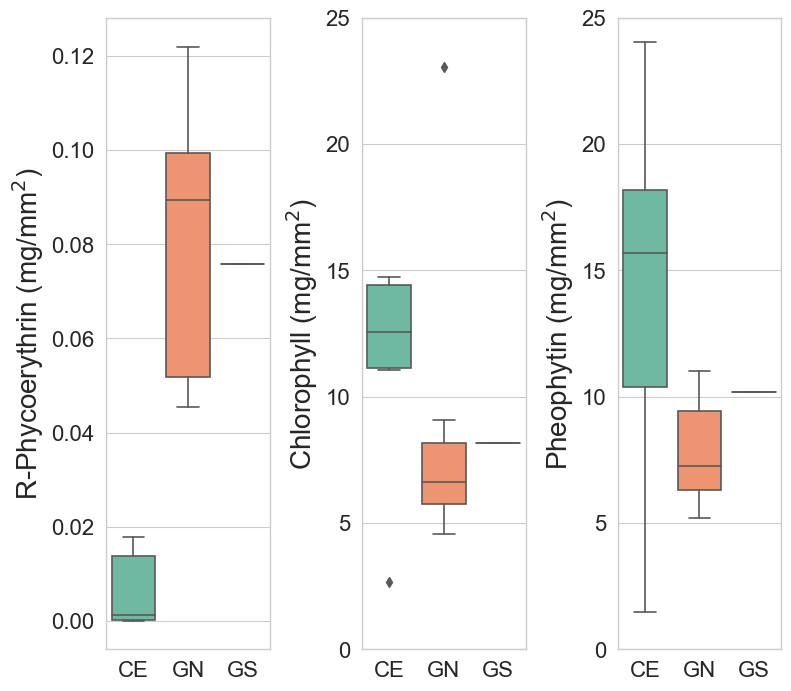

In [77]:

rc={'figure.figsize':(4,4)}
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('Set2',3)

fig, axes = plt.subplots(1,3, figsize=(8,7))

sns.boxplot(data = df_samples, y='PE_area', x='Site', ax=axes[(0)], saturation=0.8)
# sns.boxplot(data = df_samples, y='PC_area', x='Site', ax=axes[(1)], saturation=0.8)
sns.boxplot(data = df_samples, y='Chl_area', x='Site', ax=axes[(1)], saturation=0.8)
sns.boxplot(data = df_samples, y='Pheo_area', x='Site', ax=axes[(2)], saturation=0.8)

axes[0].tick_params(labelsize=16)
axes[0].set_ylabel('R-Phycoerythrin (mg/mm$^2$)', fontsize=20)
axes[0].set_xlabel('')

# axes[1].tick_params(labelsize=16)
# axes[1].set_ylabel('R-Phycocyanin (mg/mm$^2$)', fontsize=20)
# axes[1].set_xlabel('')

axes[1].tick_params(labelsize=16)
axes[1].set_ylabel('Chlorophyll (mg/mm$^2$)', fontsize=20)
axes[1].set_xlabel('')
axes[1].set_ylim([0,25])

axes[2].tick_params(labelsize=16)
axes[2].set_ylabel('Pheophytin (mg/mm$^2$)', fontsize=20)
axes[2].set_xlabel('')
axes[2].set_ylim([0,25])
 
plt.tight_layout()
# plt.savefig(out_p + '\Pigments-Plot.png', dpi=600)
plt.show()

In [70]:
# sns.set(rc={'figure.figsize':(2,2)})
# sns.set_context("paper")
# sns.set_style('whitegrid')
# sns.set_palette('Set2',3)

# fig, axes = plt.subplots(1,3, figsize=(5,5))

# sns.boxplot(data = df_merged, y='IO_PE (mg/mm2)', x='Site', ax=axes[(0)], saturation=0.8)
# sns.boxplot(data = df_merged, y='IO_PC (mg/mm2)', x='Site', ax=axes[(1)], saturation=0.8)
# sns.boxplot(data = df_merged, y='IO_APC (mg/mm2)', x='Site', ax=axes[(2)], saturation=0.8)

# fig.tight_layout()
# #plt.savefig(out_p + '\Pigments-Plot.png', dpi=600)
# plt.show()

## [A] derivatives

In [72]:
# plt.plot(cca_phycob.index, ss.savgol_filter(cca_phycob, 20, 3, deriv=2)) # not useful anymore
# plt.plot(ss.savgol_filter(cca_phycob.mean(axis=1), 35, 4, deriv=4), label='Pigmented')
# plt.axvline(434, linestyle='--', lw=2, color='grey')
# plt.axvline(494, linestyle='--', lw=2, color='grey')
# plt.axvline(563, linestyle='--', lw=2, color='grey')
# plt.axvline(624, linestyle='--', lw=2, color='grey')
# plt.axvline(665, linestyle='--', lw=2, color='grey')
# plt.show()

In [73]:
# ss.find_peaks(cca_chl, height=0.2)

NameError: name 'cca_chl' is not defined

In [75]:
# cca_chl.index[265]

## DONE

### Plotting

In [ ]:
# Phycobilins
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_phycobilins):
    #print(csv_list[i])
    df = pd.read_csv(csv_phycobilins[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_phycobilins[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_phycobilins[i].stem[0:7], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Phycobilin extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')

ax.axvline(564,**kwargs) # Phycoerythrin
ax.axvline(455,**kwargs)
ax.axvline(618,**kwargs2) # Phycocyanin
ax.axvline(645,**kwargs2)
ax.axvline(592,**kwargs2)
ax.axvline(592,**kwargs)
plt.show()

In [ ]:
# Libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load files
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\UVVIS-Phycobillins")
csv_list = list(files_path.glob('*.csv'))
csv_phycobilins = csv_list # Later used for plots
df_weights = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_weights.csv", index_col=0)
df_area = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\sample_area.csv", index_col=0)

# Sample names
col_names = ['CE01A','CE01B','CE02','CE03','CE03B','CE04','GN02','GN03','GN04','GN05','GN06','GN07','GN08','GS03']

df_samples = pd.DataFrame(columns=col_names)

samples_id = []
samples = []

#Phycobilins
for i, f in enumerate(csv_list):
    #print(csv_list[i])
    label=csv_list[i].stem[0:7]
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Cleaning dataframe
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_list[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    
    # Set Wavelength as index and Column as Sample name
    #df_bin = df_bin.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    
    df = df.set_index('Wavelength [nm]').rename(columns={'Absorbance [A]': label})
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    
    samples.append(df[label])
    samples_id.append(label)


samples_df = pd.concat(samples, axis=1, ignore_index=True)
samples_df.columns = samples_id

samples_df = samples_df.T

samples_df = samples_df.groupby(np.arange(len(samples_df)) // 2).mean()
samples_df = samples_df.T
samples_df.columns = col_names
samples_df.index


## RAW dataframe 0.2 nm
#samples_df

## Average every 5 - 0.2 nm reads / binning
df_bin = samples_df.groupby(np.arange(len(samples_df)) // 5).mean() # Mean of every 5 readings (0.2 nm)

df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
df_bin.set_index(np.arange(190,1101), inplace=True)
df_bin = df_bin.loc[380:800] # Only 380 - 800 nm wavelengths

df_bin.plot()

In [ ]:
samples_df

In [ ]:


fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df_sample_replicate, label=col_names)
plt.legend()

ax.axvline(564,**kwargs) # Phycoerythrin
ax.axvline(455,**kwargs)
ax.axvline(618,**kwargs2) # Phycocyanin
ax.axvline(645,**kwargs2)
ax.axvline(592,**kwargs2)
ax.axvline(592,**kwargs)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

#df_sample_replicate['CE01A'].plot()
#df_sample_replicate['CE01B'].plot()
#df_sample_replicate['GN07'].plot()
#df_sample_replicate['GS03'].plot()

target = ss.savgol_filter(df_sample_replicate['GN07'], 40, 7, deriv = 4)
plt.plot(target)
plt.legend(fontsize=30)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

df_sample_replicate['CE01A'].plot()
df_sample_replicate['CE01B'].plot()
df_sample_replicate['GN07'].plot()
df_sample_replicate['GS03'].plot()
plt.legend(fontsize=30)
plt.show()

In [ ]:
# Chlorophyll
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_chl):
    #print(csv_list[i])
    df = pd.read_csv(csv_chl[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_chl[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_chl[i].stem[0:7], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Chlorophyll extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')
ax.axvline(649,**kwargs) # Chlorophyll
ax.axvline(665,**kwargs2)
plt.show()

In [ ]:
# Pheophytin
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
#ax = plt.gca()
for i, f in enumerate(csv_pheo):
    #print(csv_list[i])
    df = pd.read_csv(csv_pheo[i], encoding='UTF-16', header = 6, sep='\t')
    df = df.drop(labels=['Peak absorbance [A]', 'Unnamed: 3'], axis=1)
    # Choosing where the Absorbance values start and discard rows above
    value = 'Wavelength [nm]'
    query = df.loc[df['Peak number'] == value]
    query = query.index.tolist()
    df = pd.read_csv(csv_pheo[i], encoding='UTF-16', header = int(query[0])+7, sep='\t')
    df = df.drop(df.columns[[2]], axis=1)
    #df = df.loc[950:2950] # Visible wavelengths 380 - 800 nm
    ## Average every 5 - 0.2 nm reads / binning
    df_bin = df.groupby(np.arange(len(df)) // 5).mean() # Mean of every 5 readings (0.2 nm)
    df_bin = df_bin.round({'Wavelength [nm]':0, 'Absorbance [A]':4}) #Decimals
    df_bin = df_bin.loc[190:610] # Only visible wavelengths
    #Normalize
    #normalized_df=(df_bin-df_bin.mean())/df_bin.std()
    plt.figure()
    df_bin.plot(x = 'Wavelength [nm]', y = 'Absorbance [A]', label=csv_pheo[i].stem[0:8], legend=True, ax=ax)
ax.set_title('Absorbance wavelengths for Pheophytin extracts (mg/ml)')
ax.set_ylabel('Absorbance')
ax.get_legend()
#fig.savefig(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Spectrophotometry", bbox_inches='tight')
ax.axvline(649,**kwargs) # Chlorophyll
ax.axvline(665,**kwargs2)
plt.show()

### Formula development

In [ ]:
# Phycoerythrin concentration (mg/ml)
a564 = df_bin.loc[df_bin['Wavelength [nm]'] == 564.0] # Get position
a564 = a564['Absorbance [A]'].values # Get A values
a592 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a592 = a592['Absorbance [A]'].values
a455 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a455 = a455['Absorbance [A]'].values

# Applying formula
pe_conc = ((a564 - a592) - (a455 - a592) * 0.2) * 0.12
print('Phycoerythrin (mg/ml)', pe_conc)

In [ ]:
# Phycocyanin concentration (mg/ml)
a618 = df_bin.loc[df_bin['Wavelength [nm]'] == 564.0] # Get position
a618 = a618['Absorbance [A]'].values # Get A values
a645 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a645 = a645['Absorbance [A]'].values
a592 = df_bin.loc[df_bin['Wavelength [nm]'] == 780.0]
a592 = a592['Absorbance [A]'].values

# Applying formula
pc_conc = ((a618 - a645) - (a592 - a645) * 0.51) * 0.15
print('Phycocyanin (mg/ml)', pc_conc)

## Other methods and studies looking into Absorbance
### Vasquez-Elizondo et al. 2017
- Pigment extraction and spectrophotometry. I suppose no weight reported.
- Used equations from Kursar et al. 1983 and Lichtenthaler and Wellburn (1983) for Phycobilins and Chlorophyll, respectively:
    - $Allophycocyanin \ (mg/ml) = 181.3 \ A_{651} - 22.3 \ A_{614} $ <br>
    - $Phycocyanin \ (mg/ ml) = 151.1 \ A_{614} - 99.1 \ A_{651} $ <br>
    - $Phycoerythrin \ (mg/ml) = 155.8 \ A_{498.5} - 40.0 \ A_{614} - 10.5 \ A_{651} $
- Next topic: *Reflectance* spectroscopy $R$ normalized to reflectance of bleached thalli.
- Determined light transmition (Absorbance, $D$) by placing thalli fragments against cuvette wall filled with filter seawater.
- Bleached coralline samples were used to subtract non-photosynthetic absorption.
    - Look for samples low in Phycobillins and low in Chlorophyll.
- Used an Absorbance formula to quantify efficiency of light collection, based on $D$ and pigment $mg/m^2$.
### Burdett et al. 2014
- Used reflectance spectroscopy $R$ values. Percentage of $A$ was calculated on the difference between sample absorbance and a white standard 100% $R$. 
- Absorption peaks of Rhodophyta pigments were obtained from Hedley & Mumby (2002).
- Just observed that absorption peaks matched the ones reported in the literature.
#### Main absorption peaks of Rhodophyta photosynthetic pigments from Hedley & Mumby (2002)
Not that this is from spectroscopy measurements
- Chlorophyll a:
    - chla = 435; chla2 = 670; chla3 = 680
- Carotenoids:
    - calpha1 = 423; calpha2 = 444; calpha3 = 473; calpha4 = 500
- Xantophylls:
    - zxn1 = 428; zxn2 = 450; zxn3 = 478 # Zeaxanthin
    - ltn1 = 422; ltn2 = 445; ltn3 = 474 # Lutein
- Phycobilins:
    - pcn = 618 # Phycocyanin
    - pe1 = 490; pe2 = 546; pe3 = 576 # Phycoerythrin
    - apcn = 654 # Allophycocyanin

In [ ]:
# Allophycocyanin (APC)
apc_1 = df_bin.loc[df_bin['Wavelength [nm]'] == 651.0]
apc_2 = df_bin.loc[df_bin['Wavelength [nm]'] == 614.0]
print(apc_1, apc_2)

In [ ]:
c = (181.3 * apc_1['Absorbance [A]'].values) - (22.3 * apc_2['Absorbance [A]'].values)
print(c)

## Photosynthetic pigment quantification via Paine protocol
Outputs:
- Same plot but with vertical lines with different colors of the equations used.
- Dataframe with values
### Chlorophyll

$ Chlorophyll (mg/ml) = (13.7 x A_{665}) - (5.76 x A_{649}) $

In [ ]:
print(df.loc[df['Wavelength [nm]'] == 670])

In [ ]:
df = pd.read_csv(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\UVVIS-Chlorophylls_test\blank_test.csv", engine='python', header=76, sep='\t')
df = df.drop(labels='Unnamed: 2', axis=1)

In [ ]:
df_concentrations

In [ ]:
df_concentrations.T.loc[df_concentrations.columns.str.contains('CE')]['chl'].mean()

In [ ]:
df_concentrations.T.loc[df_concentrations.columns.str.contains('CE')]['PE'].std()